In [238]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from matplotlib.pyplot import xlabel

warnings.filterwarnings('ignore')

In [239]:
df = pd.read_excel("AIB_History_Training_2014-2020.xlsx", sheet_name='HistoricalTransactions')

In [240]:
df = df.drop(columns=["FileFolder", "FileName", "Report_Title", "Report_RunDate", "Report_AsOfDate", "Currency", "Institution", "Branch", "TransactionBackdateFlag", "TransactionGroup", "TransactionCode"])
df.set_index("Report_TransactionEffectiveDate", inplace=True)
df.head()

,TransactionAmount
Report_TransactionEffectiveDate,
2013-12-30,-972.619715
2013-12-30,-75.956876
2013-12-30,127.430470
2013-12-30,-38.300469
2013-12-30,-117.467137


In [241]:
# Turn all transactions positive
df["TransactionAmount"] = df["TransactionAmount"].apply(abs)

# Daily
daily_data = df.groupby(['Report_TransactionEffectiveDate'])["TransactionAmount"].sum()
weekly_data = df.resample('W').sum()
monthly_data = df.resample('M').sum()

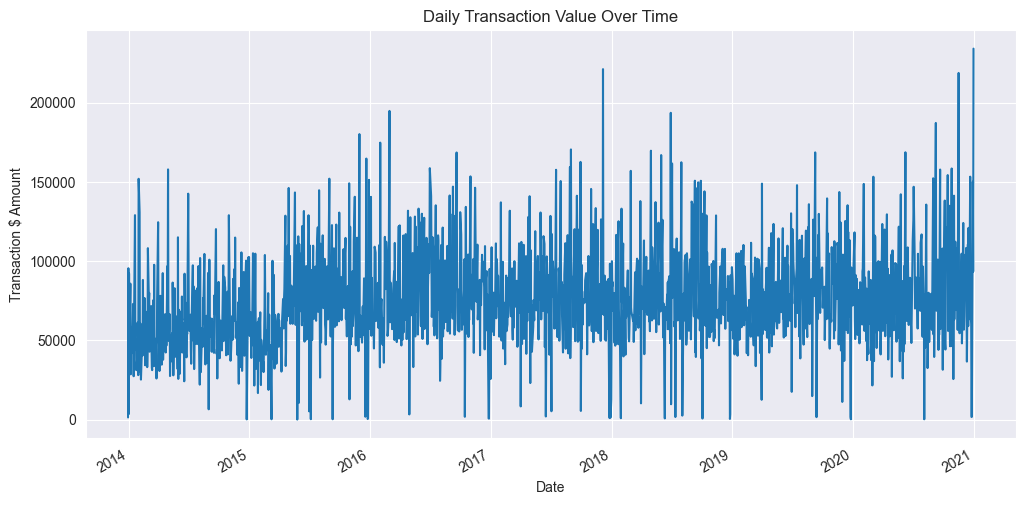

<Figure size 1200x600 with 0 Axes>

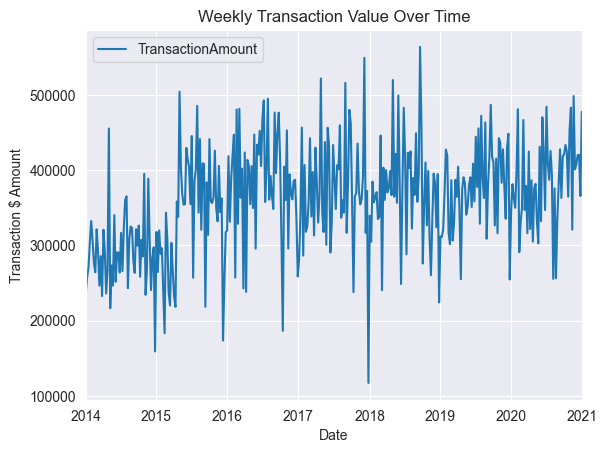

<Figure size 1200x600 with 0 Axes>

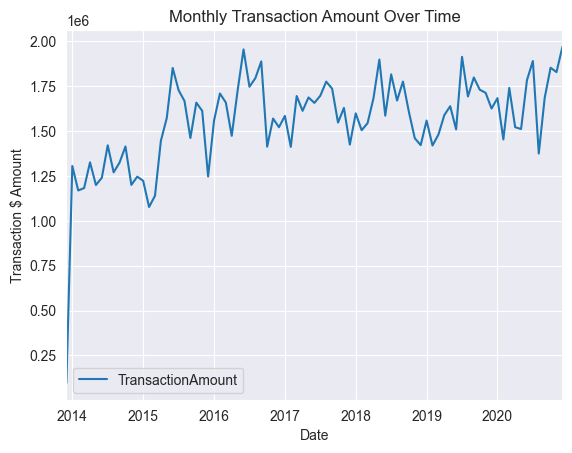

In [242]:
# fig, axes = plt.subplots(3, 1, figsize=(15, 15))
    
# Daily pattern
plt.figure(figsize=(12, 6))
daily_data.plot()
plt.title('Daily Transaction Value Over Time')
plt.xlabel('Date')
plt.ylabel('Transaction $ Amount')

# Weekly pattern
plt.figure(figsize=(12, 6))
weekly_data.plot()
plt.title('Weekly Transaction Value Over Time')
plt.xlabel('Date')
plt.ylabel('Transaction $ Amount')

#Monthly pattern
plt.figure(figsize=(12, 6))
monthly_data.plot()
plt.title('Monthly Transaction Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Transaction $ Amount')

plt.show()

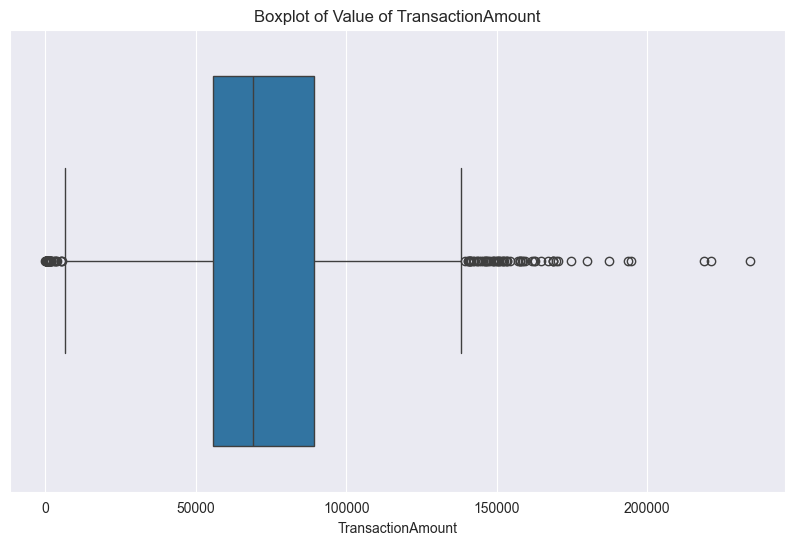

In [243]:
## Daily Transaction BoxPlot
plt.figure(figsize=(10, 6))
sns.boxplot(x=daily_data.reset_index()['TransactionAmount'])
plt.title('Boxplot of Value of TransactionAmount')
plt.show()